In [73]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
hotel = pd.read_csv("/archive/hotel_booking.csv")
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [8]:
len(hotel.columns)
len(hotel)

119390

In [ ]:
#f缺值清理

In [3]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [41]:
#移除agent、company 兩欄
hotel_na_drop=hotel.drop(labels=["agent","company"], axis=1)
#移除缺值行
hotel_na_drop=hotel_na_drop.dropna(axis=0,how='any')

In [42]:
hotel_na_drop.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [43]:
len(hotel_na_drop)

118898

In [274]:
#旅館資料
hotel_na_drop['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

In [184]:
#增加圖片解析度
%config InlineBacend.figure_fortmat='retina'


PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Text(0.5, 1.0, 'top 10 countries where visitors from')

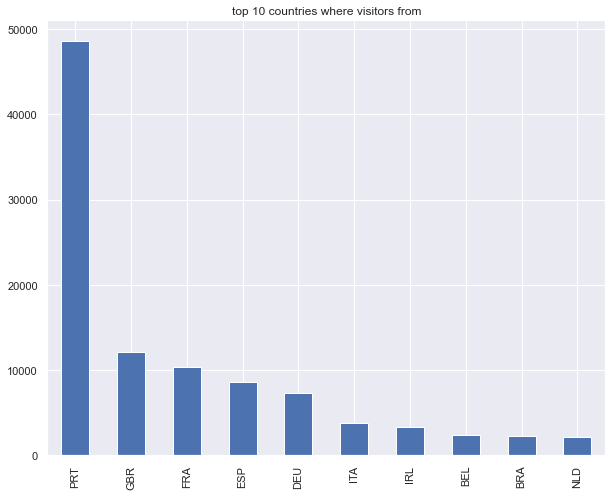

In [270]:
#前10大旅客居住城市
top_10 = hotel_na_drop['country'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('top 10 countries where visitors from')

Text(0.5, 1.0, 'channel')

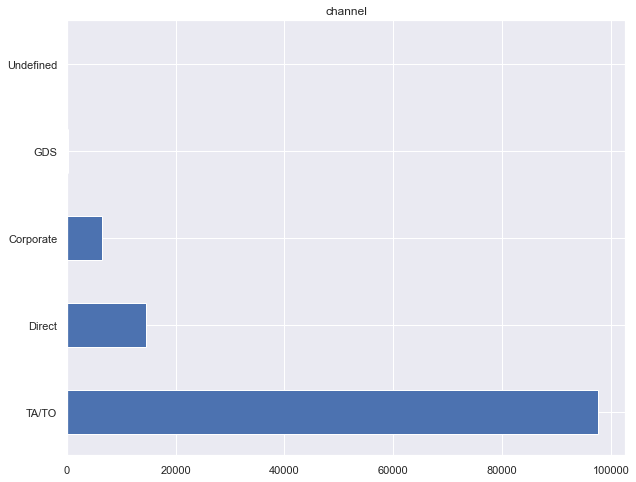

In [272]:
#顧客如何訂房(管道)
channel = hotel_na_drop['distribution_channel'].value_counts()
channel.plot(kind='barh',figsize=(10,8))
plt.title('channel')

In [54]:
hotel_R_filter=hotel_na_drop['hotel']=="Resort Hotel"
hotel_R=hotel_na_drop[hotel_R_filter]
hotel_C_filter=hotel_na_drop['hotel']!="Resort Hotel"
hotel_C=hotel_na_drop[hotel_C_filter]

<AxesSubplot:xlabel='None-arrival_date_month', ylabel='arrival_date_year'>

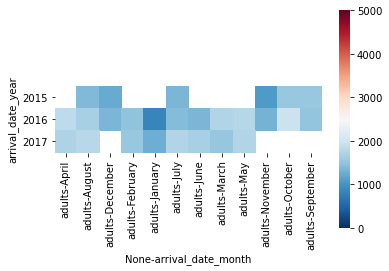

In [129]:
sales_date=hotel_R[["arrival_date_year","arrival_date_month","adults","children"]]
sales_date.describe()

sales_date=hotel_R[["arrival_date_year","arrival_date_month","adults"]]
df=sales_date.groupby(["arrival_date_year","arrival_date_month"]).count()
df
#表格轉置
df2=df.unstack() #法二pivot,法三melt
#Resort Hotel的熱門入住營業月份
sns.heatmap(data=df2,square=True,cmap="RdBu_r",vmin=0,vmax=5000) #數值軸設定維度

<AxesSubplot:xlabel='None-arrival_date_month', ylabel='arrival_date_year'>

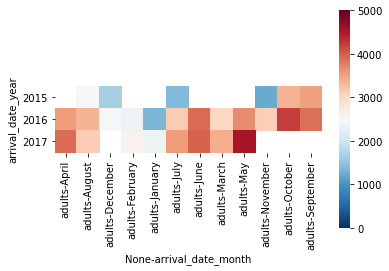

In [130]:
sales_date=hotel_C[["arrival_date_year","arrival_date_month","adults","children"]]
sales_date.describe()

sales_date=hotel_C[["arrival_date_year","arrival_date_month","adults"]]
df=sales_date.groupby(["arrival_date_year","arrival_date_month"]).count()
df
#表格轉置
df2=df.unstack()
#City Hotel的熱門入住營業月份
sns.heatmap(data=df2,square=True,cmap="RdBu_r",vmin=0,vmax=5000) #annot=True顯示數值、,cbar_kws={"orientation":"horizontal"}數值軸變更為橫向

In [161]:
#嬰幼兒
child=hotel_R[["arrival_date_year","arrival_date_month","adults","children","babies"]]
df=child.groupby(["arrival_date_year","arrival_date_month"]).sum()
df['total_customer'] = df.apply(lambda x: x.sum(), axis=1)


adults  children  babies  total_customer
arrival_date_year arrival_date_month                                          
2015              August                2823     262.0      51          3136.0
                  December              2275      96.0      23          2394.0
                  July                  2731     252.0      24          3007.0
                  November              1775      47.0      13          1835.0
                  October               2918      94.0      11          3023.0
                  September             3180      90.0      16          3286.0
2016              April                 3296     113.0      13          3422.0
                  August                3430     435.0      55          3920.0
                  December              2432     141.0      15          2588.0
                  February              2699     127.0      14          2840.0
                  January               1457      47.0       7          1511.0
                  July                  2855     318.0      37          3210.0
                  June                  2610     201.0      24          2835.0
                  March                 3140     164.0      19          3323.0
                  May                   3297     152.0      25          3474.0
                  November              2337      60.0      10          2407.0
                  October               3625     175.0      17          3817.0
                  September             2863     154.0      29          3046.0
2017              April                 3169     240.0      16          3425.0
                  August                3659     580.0      29          4268.0
                  February              2833     161.0      14          3008.0
                  January               2119      92.0      11          2222.0
                  July                  3550     558.0      24          4132.0
                  June                  3209     287.0      19          3515.0
                  March                 2609      92.0       7          2708.0
                  May                   3270     204.0      30          3504.0

<AxesSubplot:xlabel='is_canceled'>

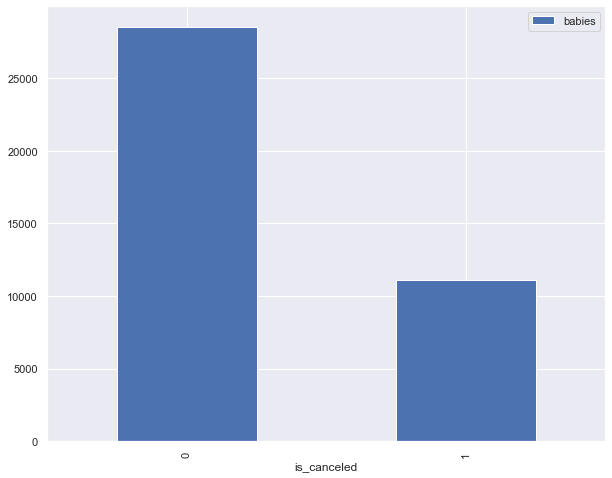

In [289]:
# 有嬰兒的顧客的取消數
hotel_na_drop["is_canceled"].value_counts()
hotel_R["is_canceled"].value_counts()

cancel=hotel_R[["babies","is_canceled"]]
cancel=cancel.groupby(["is_canceled"]).count()
cancel.plot(kind='bar',figsize=(10,8))


In [ ]:
#機器學習優化方向：入住取消率(是否有嬰幼兒)、ADR

In [159]:
#假設平台可抽取20%傭金
#平均房價ADR=客房總收入已售客房數
stay_=hotel_R[["arrival_date_year","arrival_date_month","stays_in_weekend_nights","stays_in_week_nights"]]
df=stay.groupby(["arrival_date_year","arrival_date_month"]).sum()
df['stay_night'] = df.apply(lambda x: x.sum(), axis=1)
adr=hotel_R[["arrival_date_year","arrival_date_month","adr"]]
df["adr"]=adr.groupby(["arrival_date_year","arrival_date_month"]).mean()
df

stays_in_weekend_nights  \
arrival_date_year arrival_date_month                            
2015              August                                 2149   
                  December                               1159   
                  July                                   1863   
                  November                                938   
                  October                                1780   
                  September                              2077   
2016              April                                  1978   
                  August                                 2397   
                  December                               1221   
                  February                               1265   
                  January                                 595   
                  July                                   2216   
                  June                                   2083   
                  March                                  1494   
                  May                                    2032   
                  November                               1231   
                  October                                2297   
                  September                              2112   
2017              April                                  2121   
                  August                                 2577   
                  February                               1438   
                  January                                1067   
                  July                                   2706   
                  June                                   2458   
                  March                                  1949   
                  May                                    2169   

                                      stays_in_week_nights  stay_night  \
arrival_date_year arrival_date_month                                     
2015              August                              5366        7515   
                  December                            2791        3950   
                  July                                5052        6915   
                  November                            3101        4039   
                  October                             4471        6251   
                  September                           5905        7982   
2016              April                               5062        7040   
                  August                              6331        8728   
                  December                            3357        4578   
                  February                            3126        4391   
                  January                             1771        2366   
                  July                                5520        7736   
                  June                                5394        7477   
                  March                               4679        6173   
                  May                                 5190        7222   
                  November                            3394        4625   
                  October                             5353        7650   
                  September                           5450        7562   
2017              April                               5296        7417   
                  August                              6680        9257   
                  February                            3711        5149   
                  January                             2864        3931   
                  July                                6736        9442   
                  June                                6380        8838   
                  March                               5560        7509   
                  May                                 5852        8021   

                                             adr  
arrival_date_year arrival_date_month              
2015              August              155.